In [1]:
import numpy as np 
import matplotlib.pylab as plt 

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [3]:
template_list_folder = 'TEMPLATE_LIST'
template_folder = 'SED'
template_list = 'test_240_2.list'

In [4]:
template_names = np.loadtxt("{}/{}".format(template_list_folder, template_list), dtype=str)
nt = len(template_names)

In [5]:
interp_x = np.arange(0, 25600, 5)
template_data = np.zeros((nt, len(interp_x)))

In [6]:
print(f'Number of templates is {template_data.shape[0]}')

Number of templates is 215


In [7]:
for it in range(nt):
    seddata = np.genfromtxt("{}/{}".format(template_folder, template_names[it]))
    wavelength, template_sed = seddata[:, 0], seddata[:, 1] * seddata[:, 0] ** 2

    fnorm = np.interp(7e3, wavelength, template_sed)
    interp_sed = np.interp(interp_x, wavelength, template_sed)
    template_data[it] = interp_sed

# PCA

In [43]:
# mu = np.mean(template_data, axis = 0)
# std = np.std(template_data, axis = 0)
# X = (template_data - mu) / std

In [48]:
X = preprocessing.normalize(template_data)
mu = X.mean(0)
std = X.std(0)

In [49]:
ncomponents = 4
rpca = PCA(n_components=ncomponents, svd_solver="randomized")
X_proj = rpca.fit_transform(X)

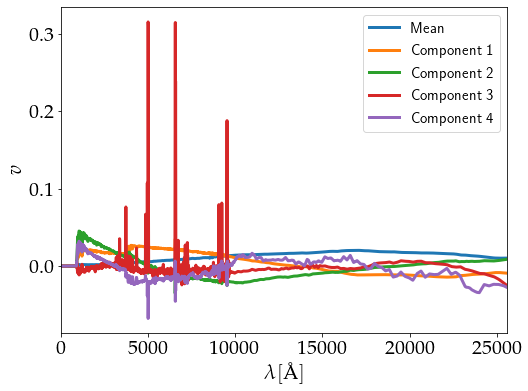

In [51]:
plt.figure(figsize = (8,6))
plt.plot(interp_x, rpca.mean_, label = 'Mean', lw = 3)
for i in range(ncomponents):
    plt.plot(interp_x, rpca.components_[i], label = f'Component {i+1}', lw = 3)
plt.xlim(min(interp_x), max(interp_x))
plt.ylabel(r'$v$', fontsize = fontSize)
plt.xlabel(r'$\lambda [\textrm{\AA}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
# plt.savefig('/home/harry/Desktop/pca.pdf', bbox_inches = 'tight')
plt.show()

# Clustering

In [11]:
ncluster = 6
clustering = KMeans(n_clusters=ncluster).fit(X_proj)
labels = clustering.labels_
orginal_colour_list = np.array(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "black"])
colour_labels = orginal_colour_list[labels]

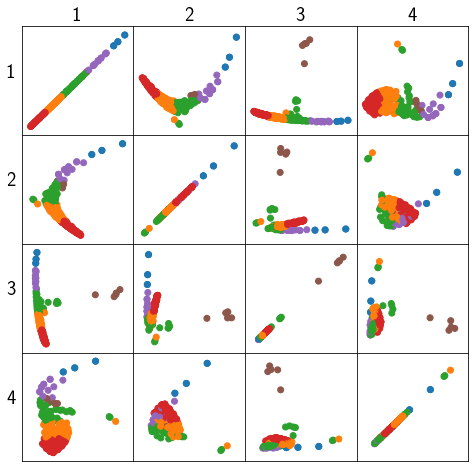

In [25]:
rows = 4
cols = 4

fig, ax2 = plt.subplots(nrows=rows, ncols=cols, figsize = (8, 8))
for i in range(rows * cols):
    row = i // cols
    col = i % cols
    ax2[row, col].scatter(X_proj[:, row], X_proj[:, col], color=colour_labels)
    ax2[row, col].set_xticks([])
    ax2[row, col].set_yticks([])
    if row == 0:
        ax2[row, col].set_title(f"{col + 1}", fontsize=fontSize)
    if col == 0:
        ax2[row, col].set_ylabel(f"{row + 1}", rotation=0, fontsize=fontSize, labelpad=10)

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('/home/harry/Desktop/clustering.pdf', bbox_inches = 'tight')
plt.show()